In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import scipy.stats as scs
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
data = sm.datasets.co2.load_pandas()
df = data.data
df.head(5)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [3]:
df.tail()

,co2
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3
2001-12-29,371.5


In [4]:
# The 'MS' string groups the data in buckets by start of the month
ts = df['co2'].resample('MS').mean()
ts.head(5)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [5]:
ts.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2001-03-01', '2001-04-01', '2001-05-01', '2001-06-01',
               '2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01',
               '2001-11-01', '2001-12-01'],
              dtype='datetime64[ns]', length=526, freq='MS')

In [6]:
ts.isnull().sum()

np.int64(5)

In [7]:
ts=ts.fillna(ts.bfill())

In [8]:
ts.isnull().sum()

np.int64(0)

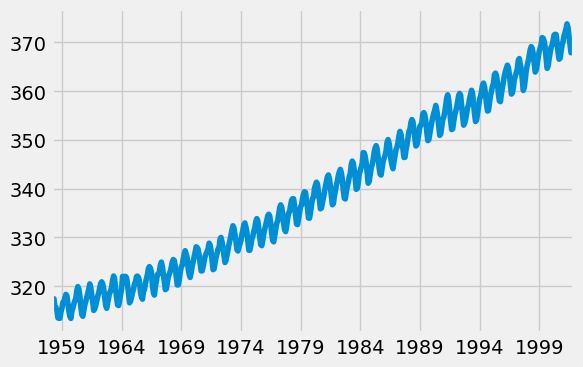

In [9]:
plt.close()
ts.plot(figsize=(6, 4))
plt.show()

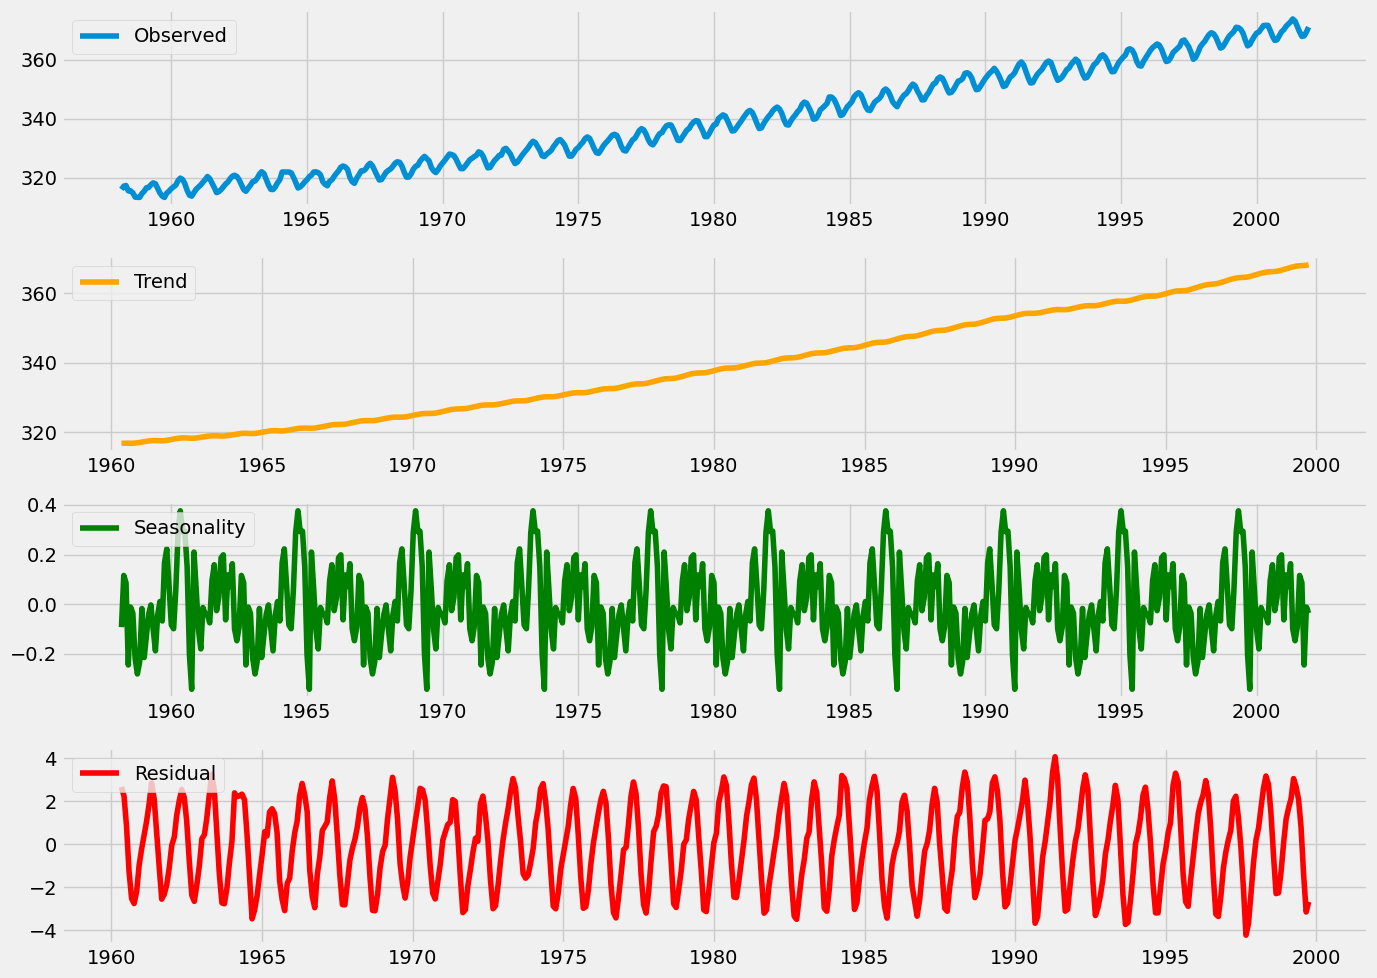

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series (assuming weekly data, so period=52)
decomposition = seasonal_decompose(ts, model='additive', period=52)

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [11]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
adf_result = adfuller(ts.dropna())
print("🔍 ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values: {adf_result[4]}")
print("=> Stationary" if adf_result[1] < 0.05 else "=> Not Stationary")

# KPSS Test
kpss_result = kpss(ts.dropna(), regression='c', nlags='auto')  # 'c' = constant (level stationarity)
print("\n🔍 KPSS Test Results:")
print(f"KPSS Statistic: {kpss_result[0]:.4f}")
print(f"p-value: {kpss_result[1]:.4f}")
print(f"Critical Values: {kpss_result[3]}")
print("=> Stationary" if kpss_result[1] > 0.05 else "=> Not Stationary")


🔍 ADF Test Results:
ADF Statistic: 2.3598
p-value: 0.9990
Critical Values: {'1%': np.float64(-3.4432119442564324), '5%': np.float64(-2.8672126791646955), '10%': np.float64(-2.569791324979607)}
=> Not Stationary

🔍 KPSS Test Results:
KPSS Statistic: 3.3695
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
=> Not Stationary


C:\Users\jyoti\AppData\Local\Temp\ipykernel_3624\4020212410.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(ts.dropna(), regression='c', nlags='auto')  # 'c' = constant (level stationarity)


In [12]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
adf_result = adfuller(np.log(ts))
print("🔍 ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values: {adf_result[4]}")
print("=> Stationary" if adf_result[1] < 0.05 else "=> Not Stationary")

# KPSS Test
kpss_result = kpss(np.log(ts), regression='c', nlags='auto')  # 'c' = constant (level stationarity)
print("\n🔍 KPSS Test Results:")
print(f"KPSS Statistic: {kpss_result[0]:.4f}")
print(f"p-value: {kpss_result[1]:.4f}")
print(f"Critical Values: {kpss_result[3]}")
print("=> Stationary" if kpss_result[1] > 0.05 else "=> Not Stationary")


🔍 ADF Test Results:
ADF Statistic: 1.9940
p-value: 0.9987
Critical Values: {'1%': np.float64(-3.4432119442564324), '5%': np.float64(-2.8672126791646955), '10%': np.float64(-2.569791324979607)}
=> Not Stationary

🔍 KPSS Test Results:
KPSS Statistic: 3.3799
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
=> Not Stationary


C:\Users\jyoti\AppData\Local\Temp\ipykernel_3624\1641985056.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(np.log(ts), regression='c', nlags='auto')  # 'c' = constant (level stationarity)


In [13]:
from statsmodels.tsa.seasonal import STL

stl = STL(ts, period=52)
result = stl.fit()

residual = ts - result.trend


In [14]:
from statsmodels.tsa.stattools import adfuller, kpss

print("🔍 ADF Test on STL Residual:")
adf_result = adfuller(residual)
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values: {adf_result[4]}")
print("=> Stationary" if adf_result[1] < 0.05 else "=> Not Stationary")

print("\n🔍 KPSS Test on STL Residual:")
kpss_result = kpss(residual, regression='c', nlags='auto')
print(f"KPSS Statistic: {kpss_result[0]:.4f}")
print(f"p-value: {kpss_result[1]:.4f}")
print(f"Critical Values: {kpss_result[3]}")
print("=> Stationary" if kpss_result[1] > 0.05 else "=> Not Stationary")


🔍 ADF Test on STL Residual:
ADF Statistic: -7.5205
p-value: 0.0000
Critical Values: {'1%': np.float64(-3.443339692005083), '5%': np.float64(-2.8672689011327894), '10%': np.float64(-2.569821287318971)}
=> Stationary

🔍 KPSS Test on STL Residual:
KPSS Statistic: 0.0067
p-value: 0.1000
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
=> Stationary


C:\Users\jyoti\AppData\Local\Temp\ipykernel_3624\778250270.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(residual, regression='c', nlags='auto')


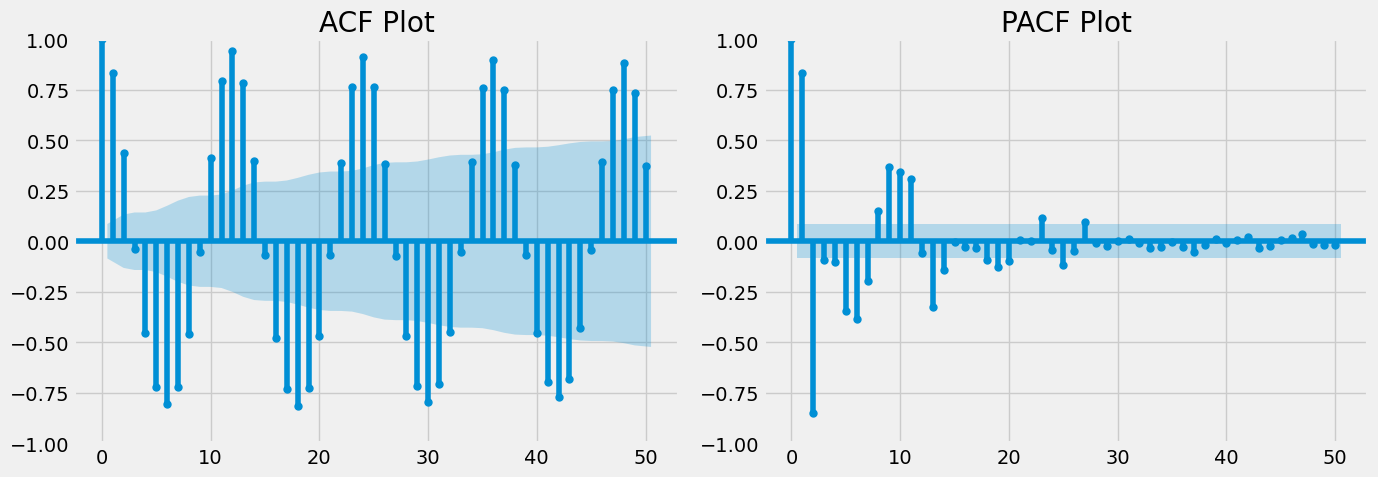

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_acf(residual, lags=50, ax=plt.gca())
plt.title("ACF Plot")

plt.subplot(1, 2, 2)
plot_pacf(residual, lags=50, ax=plt.gca())
plt.title("PACF Plot")

plt.tight_layout()
plt.show()


In [31]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(residual, order=(1, 0, 1))  # d=0 because it's already stationary
result = model.fit()
print("ARIMA(1,0,1)")
print(result.summary())
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(residual, order=(2, 0, 1))  # d=0 because it's already stationary
result = model.fit()
print("ARIMA(2,0,1)")
print(result.summary())
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(residual, order=(1, 0, 2))  # d=0 because it's already stationary
result = model.fit()
print("ARIMA(1,0,2)")
print(result.summary())
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(residual, order=(2, 0, 2))  # d=0 because it's already stationary
result = model.fit()
print("ARIMA(2,0,2)")
print(result.summary())



ARIMA(1,0,1)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  526
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -653.921
Date:                Sat, 02 Aug 2025   AIC                           1315.841
Time:                        11:55:03   BIC                           1332.903
Sample:                    03-01-1958   HQIC                          1322.522
                         - 12-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0261      0.284     -0.092      0.927      -0.583       0.531
ar.L1          0.7677      0.037     20.917      0.000       0.696       0.840
ma.L1          0.6747      0.038     17

In [17]:
# Seasonal differencing with period 52 (yearly for weekly data)
ts_seasonal_diff = ts.diff(12).dropna()


In [18]:
from statsmodels.tsa.stattools import adfuller, kpss

print("🔍 ADF Test on STL Residual:")
adf_result = adfuller(ts_seasonal_diff)
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values: {adf_result[4]}")
print("=> Stationary" if adf_result[1] < 0.05 else "=> Not Stationary")

🔍 ADF Test on STL Residual:
ADF Statistic: -4.6262
p-value: 0.0001
Critical Values: {'1%': np.float64(-3.443496379464), '5%': np.float64(-2.8673378563200003), '10%': np.float64(-2.569858036)}
=> Stationary


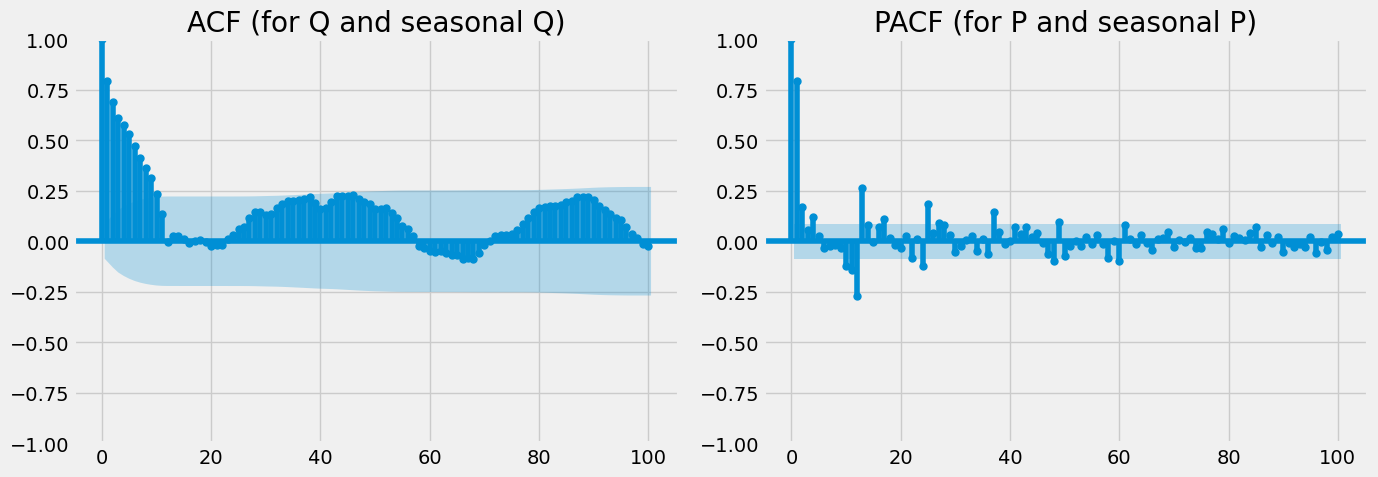

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_acf(ts_seasonal_diff, lags=100, ax=plt.gca())
plt.title("ACF (for Q and seasonal Q)")

plt.subplot(1, 2, 2)
plot_pacf(ts_seasonal_diff, lags=100, ax=plt.gca())
plt.title("PACF (for P and seasonal P)")

plt.tight_layout()
plt.show()


In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(ts, 
                order=(1, 0, 1),            # (p, d, q)
                seasonal_order=(1, 0, 1, 12))  # (P, D, Q, s)
result = model.fit(disp=False)
print("order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)")
print(result.summary())


C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)
                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                  526
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -201.151
Date:                            Sat, 02 Aug 2025   AIC                            412.303
Time:                                    11:33:06   BIC                            433.629
Sample:                                03-01-1958   HQIC                           420.653
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.001   1690.355      0.000       0.998  

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(ts, 
                order=(2, 0, 1),            # (p, d, q)
                seasonal_order=(1, 0, 1, 12))  # (P, D, Q, s)
result = model.fit(disp=False)
print("order=(2, 0, 1), seasonal_order=(1, 0, 1, 12)")
print(result.summary())


C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


order=(2, 0, 1), seasonal_order=(1, 0, 1, 12)
                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                  526
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -223.948
Date:                            Sat, 02 Aug 2025   AIC                            459.896
Time:                                    11:33:09   BIC                            485.488
Sample:                                03-01-1958   HQIC                           469.917
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0219      0.010      2.269      0.023       0.003  

C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(ts, 
                order=(1, 0, 2),            # (p, d, q)
                seasonal_order=(1, 0, 1, 12))  # (P, D, Q, s)
result = model.fit(disp=False)
print("order=(1, 0, 2), seasonal_order=(1, 0, 1, 12)")
print(result.summary())


C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


order=(1, 0, 2), seasonal_order=(1, 0, 1, 12)
                                      SARIMAX Results                                       
Dep. Variable:                                  co2   No. Observations:                  526
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -197.533
Date:                              Sat, 02 Aug 2025   AIC                            407.066
Time:                                      11:33:11   BIC                            432.658
Sample:                                  03-01-1958   HQIC                           417.086
                                       - 12-01-2001                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.001   1424.812      0.0

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(ts, 
                order=(2, 0, 2),            # (p, d, q)
                seasonal_order=(1, 0, 1, 12))  # (P, D, Q, s)
result = model.fit(disp=False)
print("order=(2, 0, 2), seasonal_order=(1, 0, 1, 12)")
print(result.summary())


C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


order=(2, 0, 2), seasonal_order=(1, 0, 1, 12)
                                      SARIMAX Results                                       
Dep. Variable:                                  co2   No. Observations:                  526
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -204.891
Date:                              Sat, 02 Aug 2025   AIC                            423.782
Time:                                      11:33:14   BIC                            453.639
Sample:                                  03-01-1958   HQIC                           435.472
                                       - 12-01-2001                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0541      0.021      2.575      0.0

In [24]:
# Assuming ts is already your weekly time series with a DateTimeIndex
train = ts.iloc[:-52]
test = ts.iloc[-52:]


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,
                order=(1, 0, 1),
                seasonal_order=(1, 0, 1, 12))
result = model.fit(disp=False)


C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\jyoti\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
# Forecast for the same length as test set
forecast_result = result.get_forecast(steps=52)

# Extract forecasted mean values
forecast = forecast_result.predicted_mean


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation metrics
mse = mean_squared_error(test, forecast) 
rmse=np.sqrt(mse)
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print("Evaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²   : {r2:.4f}")


Evaluation Metrics:
RMSE: 1.6059
MAE : 1.5342
R²   : 0.7066


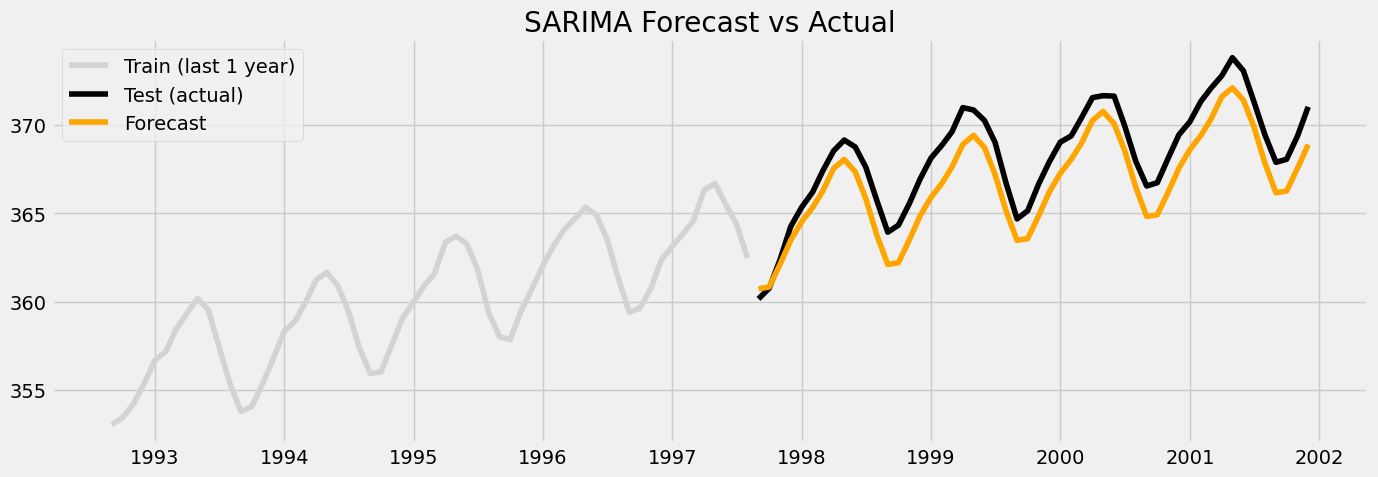

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(train[-60:], label='Train (last 1 year)', color='lightgray')
plt.plot(test, label='Test (actual)', color='black')
plt.plot(forecast, label='Forecast', color='orange')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


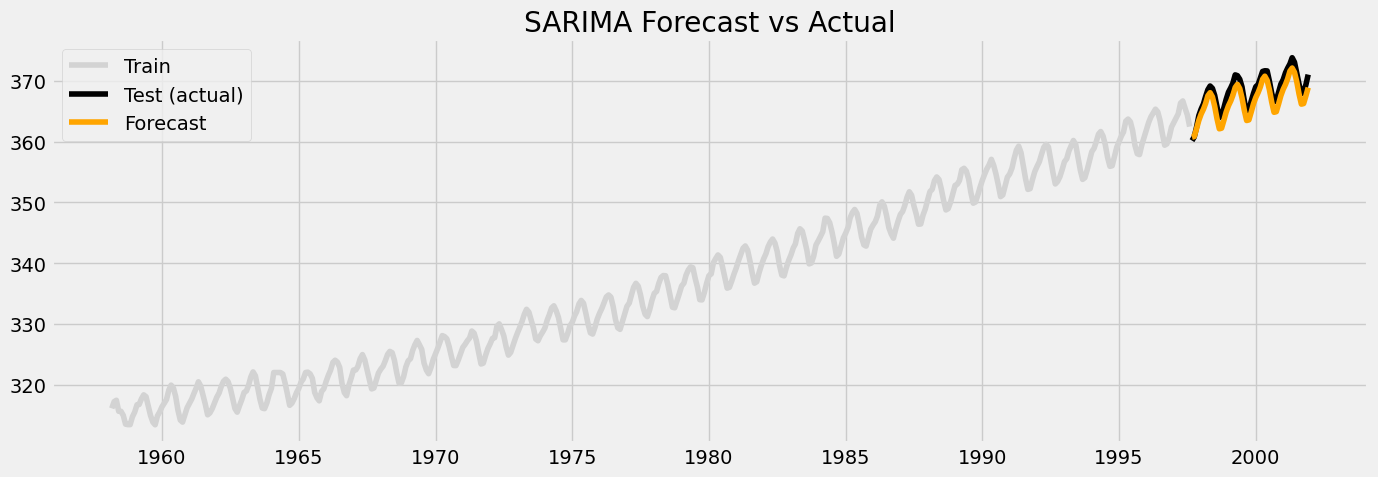

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(train, label='Train', color='lightgray')   # Full training data
plt.plot(test, label='Test (actual)', color='black')
plt.plot(forecast, label='Forecast', color='orange')

plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
ts.shape

(526,)